<a href="https://colab.research.google.com/github/ajaysaikiran2208/Natural-Language-Processing/blob/main/AMAZON_REVIEWS_Key_word_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Phrase Extraction using TextRank and SG Rank

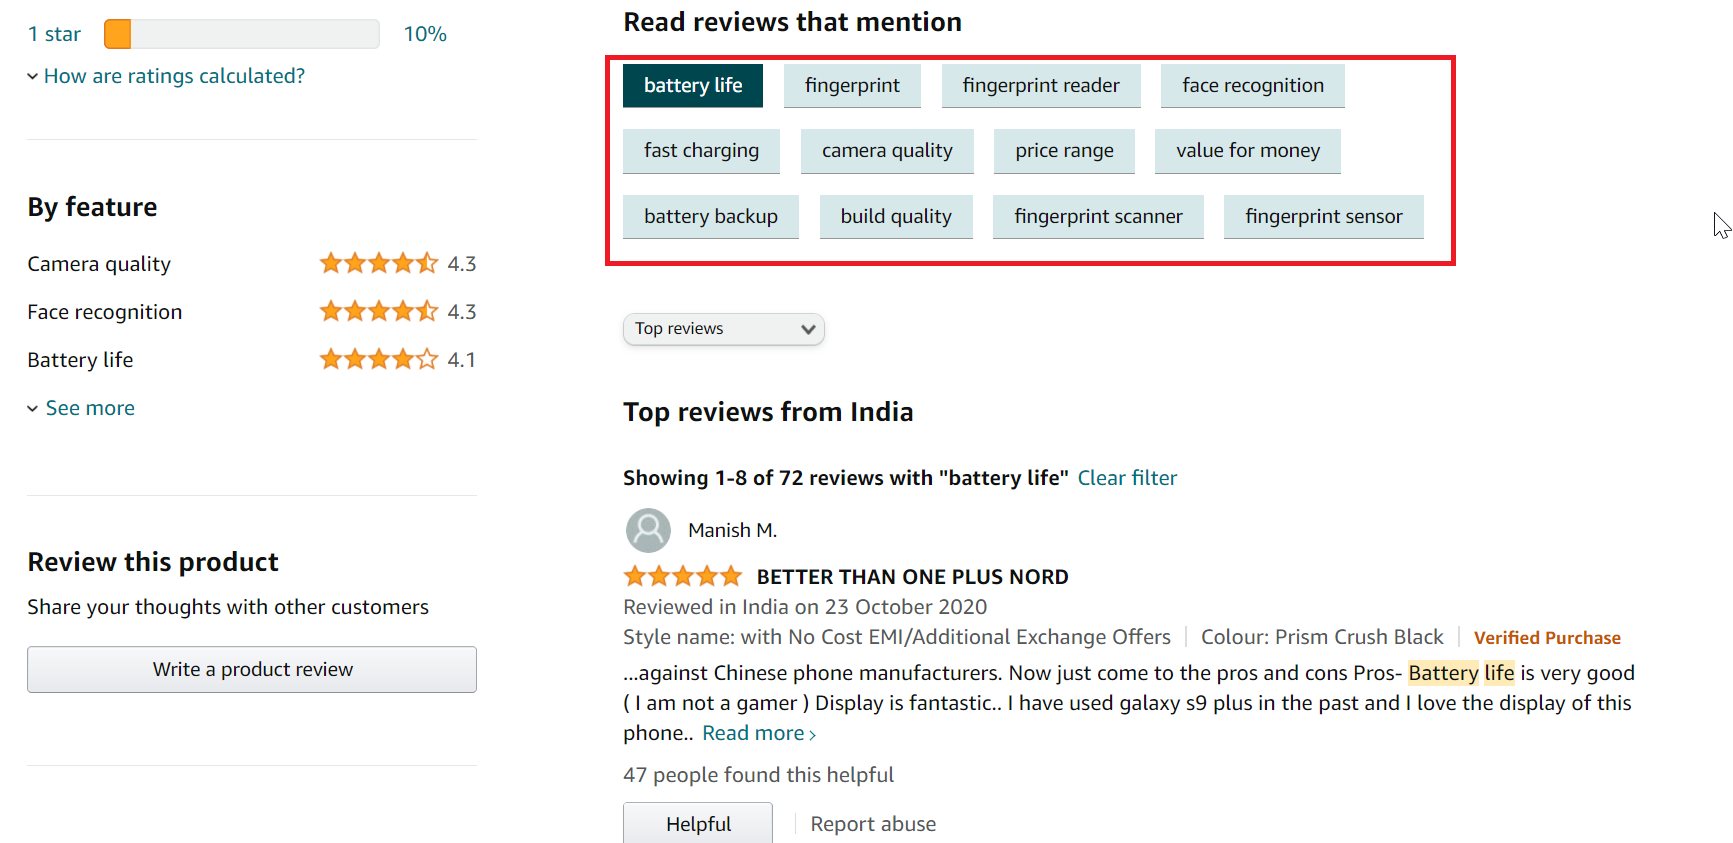

#Importing Libraries

In [1]:
#We need texacy, which inturn loads spacy library
!pip install textacy==0.9.1

     |████████████████████████████████| 204kB 4.3MB/s 
     |████████████████████████████████| 481kB 28.9MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 2.0MB 30.2MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp37-cp37m-linux_x86_64.whl size=1224600 sha256=d1449c3cc0ba585d9f37a8772864d8b480971132ad9c183569af212b1a2d7f00
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz


In [2]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
#Use spacy version 2.2.4 for this notebook
!pip install spacy==2.2.4

In [4]:
import spacy
import textacy.ke
from textacy import *

#Loading Spacy Model

In [5]:
#Load a spacy model, which will be used for all further processing.
en = textacy.load_spacy_lang("en_core_web_sm")

#Uploading Text document 

In [9]:
try :
    from google.colab import files
    uploaded=files.upload()
    mytext = open('/content/REVIEW.txt').read()

except ModuleNotFoundError :
    mytext = open('/content/REVIEW.txt').read()

Saving REVIEW.txt to REVIEW.txt


#Converting Text into Spacy Document

In [11]:
#convert the text into a spacy document.
doc = textacy.make_spacy_doc(mytext, lang=en)

In [12]:
doc


After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.
Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!
Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!
It seems OK, but very basic. Recurring tasks need some work to be actually useful. For examp

#Ranking for Key Phrases using text rank and SG rank

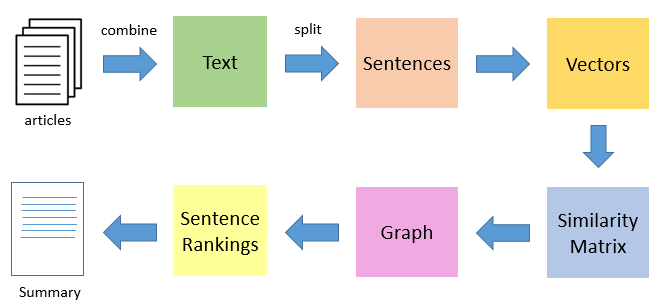

The first step would be to concatenate all the text contained in the articles.

Then split the text into individual sentences

In the next step, we will find vector representation (word embeddings) for each and every sentence

Similarities between sentence vectors are then calculated and stored in a matrix

The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation

Finally, a certain number of top-ranked sentences form the final summary

In [13]:
textacy.ke.textrank(doc, topn=5)

[('reminder app', 0.014188899788352683),
 ('free app', 0.012724256086636873),
 ('star app', 0.012714198114259416),
 ('super irritating app', 0.012083293885744523),
 ('awesome app', 0.010863055740606427)]

In [14]:
textacy.ke.sgrank(doc, topn=5)

[('terrible customer experience', 0.20568981702156558),
 ('app', 0.09147134774812277),
 ('response', 0.032404680354343726),
 ('trial', 0.031185757102274007),
 ('time', 0.026509248589597596)]

In [15]:
#Print the keywords using TextRank algorithm, as implemented in Textacy.
print("Textrank output: ", [kps for kps, weights in textacy.ke.textrank(doc, normalize="lemma", topn=5)])\
#Print the key words and phrases, using SGRank algorithm, as implemented in Textacy
print("SGRank output: ", [kps for kps, weights in textacy.ke.sgrank(doc, topn=5)])

Textrank output:  ['reminder app', 'free app', 'star app', 'super irritating app', 'awesome app']
SGRank output:  ['terrible customer experience', 'app', 'response', 'trial', 'time']


In [16]:
#To address the issue of overlapping key phrases, textacy has a function: aggregage_term_variants.
#Choosing one of the grouped terms per item will give us a list of non-overlapping key phrases!
terms = set([term for term,weight in textacy.ke.textrank(doc)])
print(textacy.ke.utils.aggregate_term_variants(terms))

[{'available bin premium mode'}, {'super irritating app'}, {'year subscription'}, {'reminder app'}, {'awesome app'}, {'free trial'}, {'edit time'}, {'day trial'}, {'star app'}, {'free app'}]


In [17]:
#To address the issue of overlapping key phrases, textacy has a function: aggregage_term_variants.
#Choosing one of the grouped terms per item will give us a list of non-overlapping key phrases!
terms = set([term for term,weight in textacy.ke.sgrank(doc)])
print(textacy.ke.utils.aggregate_term_variants(terms))

[{'terrible customer experience'}, {'subscription'}, {'response'}, {'Google'}, {'money'}, {'trial'}, {'task'}, {'time'}, {'star'}, {'app'}]


In [18]:
#A way to look at key phrases is just consider all noun chunks as potential ones. 
#However, keep in mind this will result in a lot of phrases, and no way to rank them!

chunk=print([chunk for chunk in textacy.extract.noun_chunks(doc)])

[response, developer, I, rating, 0 stars, guys, confusing and opaque terms, I, money, them, Really terrible customer experience, free trial, app, you, they, you, full years subscription, Terrible customer experience, app, it, fair amount, time, problems, me, account, Google, FB, I, Google, one, everything, app, I, it, it, it, what, I, list, I, garbage, It, Recurring tasks, work, example, it, task, month, month, I, dark theme, options, I, they, basic options, them, I, reason, app, actual premium options, app, prohibitively clunky interface, promise, life, Google Calendar, other services, annual subscription rate, free trial, It, forty bucks, you, you, it, it, time, money, trial period, scam, I, free version, while, premium, 7 days, trial ad, 5 days, I, it, information, I, I, They, me, I, non trial, strict Terms, me, I, intention, it, Ad, they, it, BUY PREMIUM, You, entire year upfront, you, mind, app, I, odd inconsistent behavior, tasks, reminders, You, 7 day trial, refund, you, issues,